# Predicting NBA Player Career Duration and Twitter Sentiment

In [1]:
%load_ext lab_black
import warnings
import sys

sys.path.append("..")
from src.main import analyze_nba_career_duration_model, analyze_twitter_sentiment_model
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

Run model pipeline fit and plot learning curves for all 5 models

Analyzing Decision Tree completed in 8.6758 seconds
Analyzing Neural Network completed in 349.9534 seconds
Analyzing AdaBoost completed in 32.4138 seconds
Analyzing SVC completed in 85.9353 seconds
Analyzing KNN completed in 14.0110 seconds


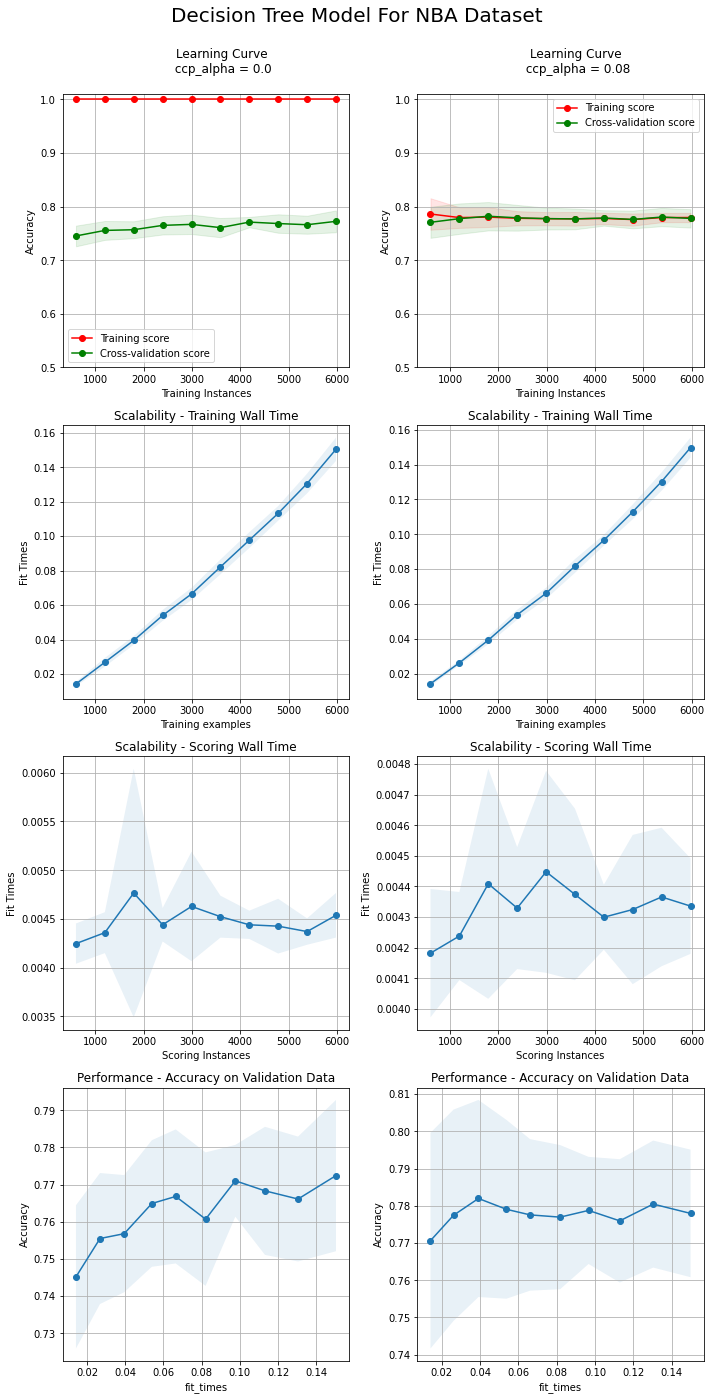

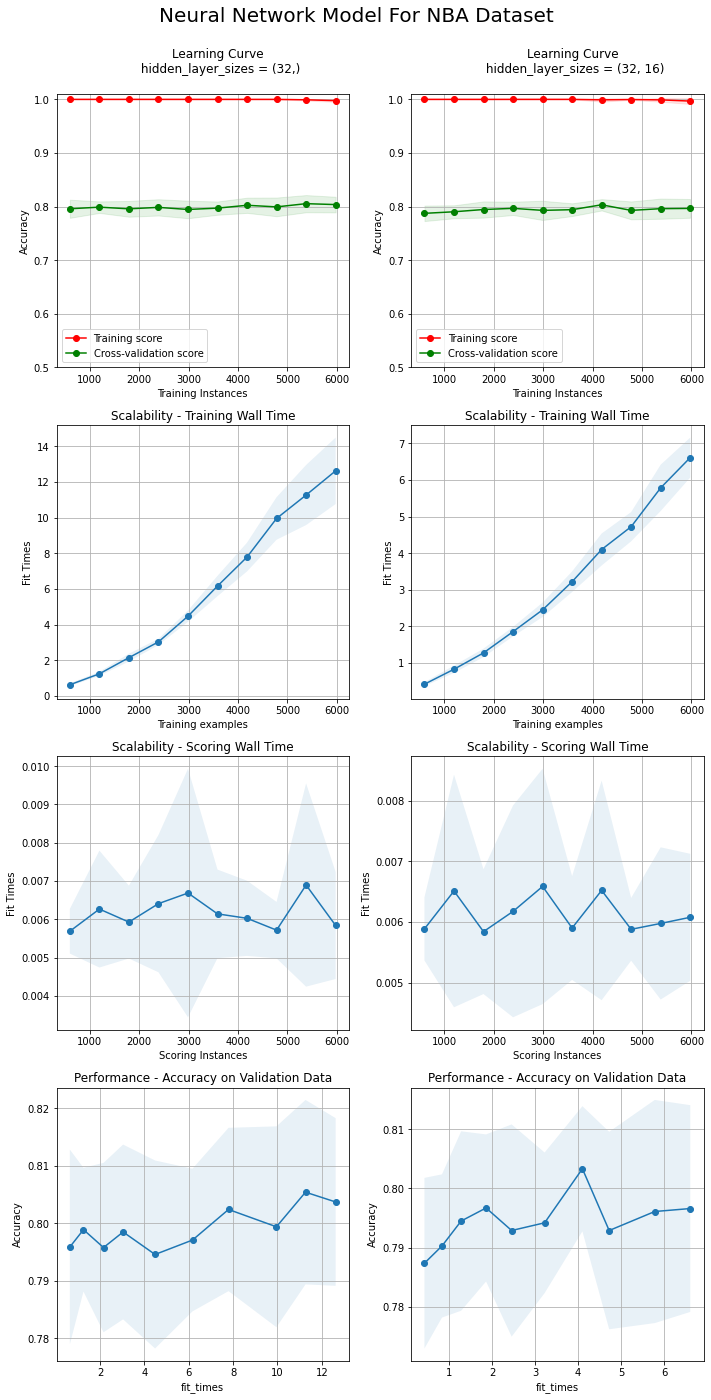

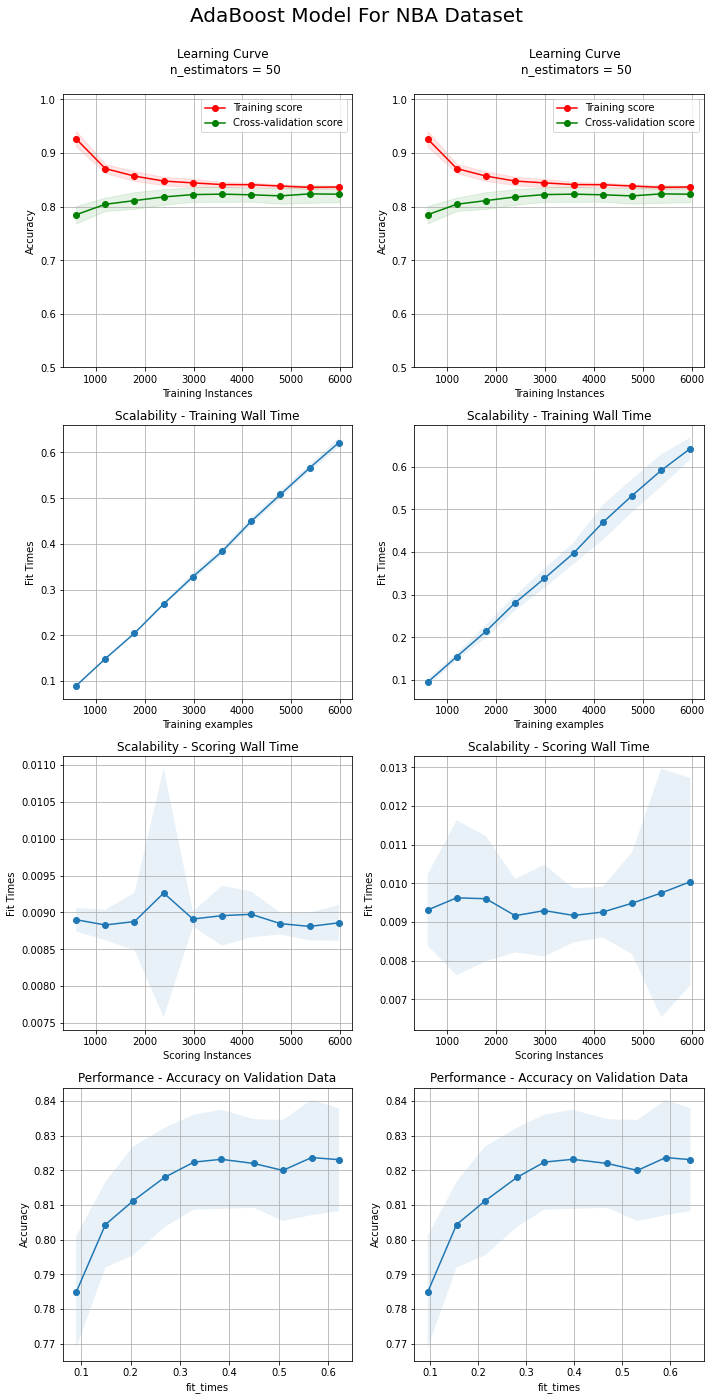

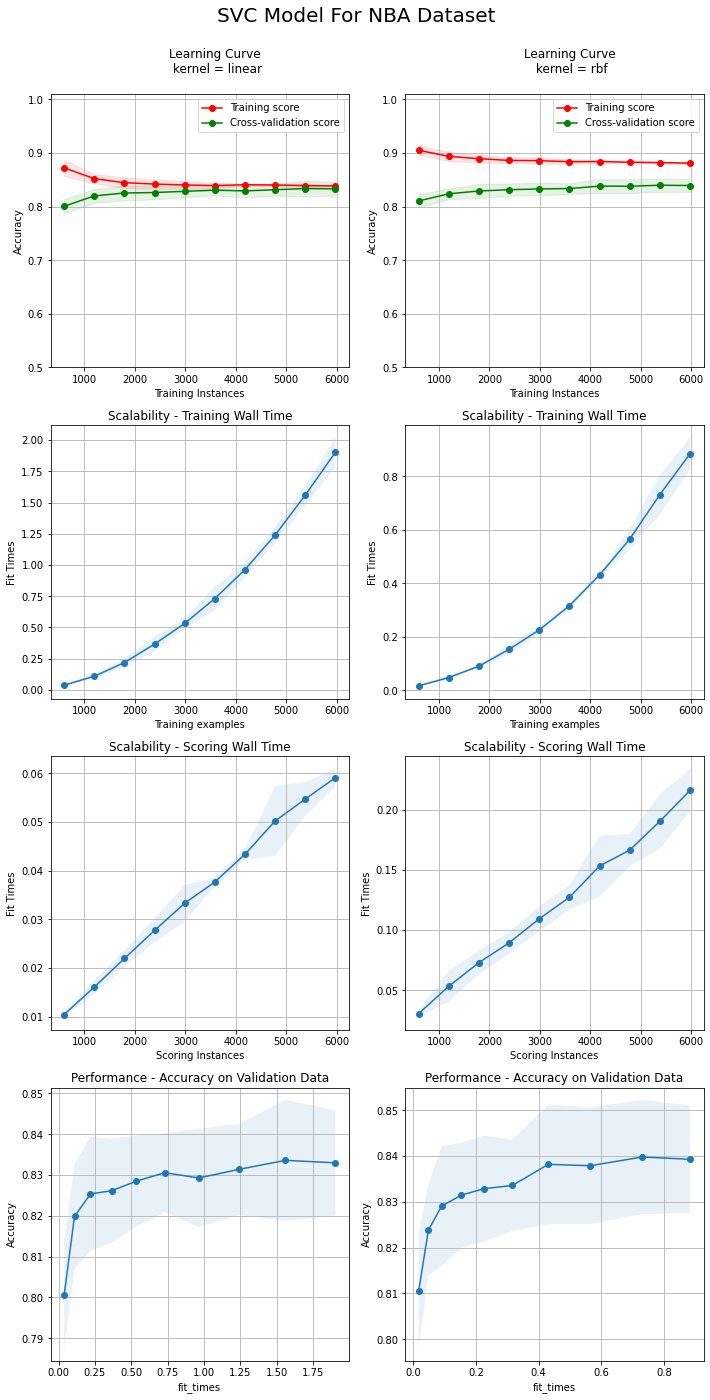

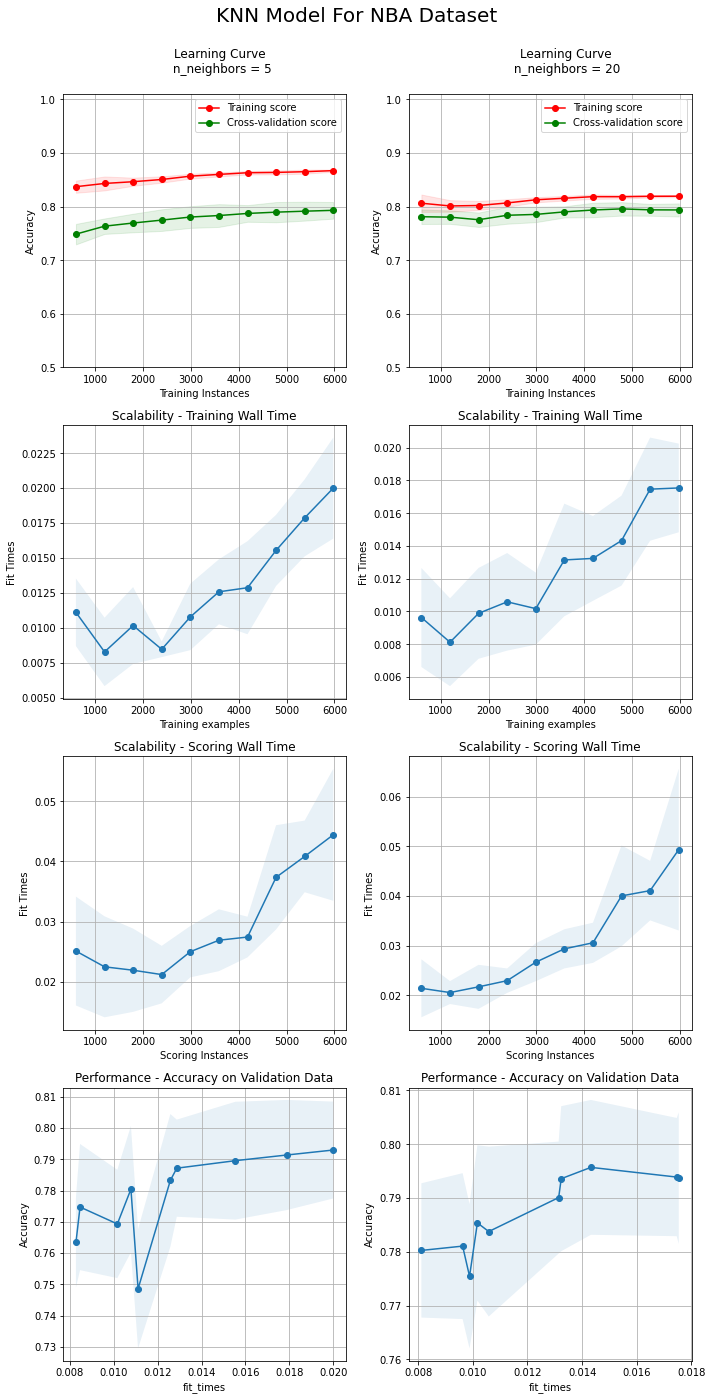

In [2]:
analyze_nba_career_duration_model()

In [ ]:
analyze_twitter_sentiment_model()

Analyzing Decision Tree completed in 194.3779 seconds
